# Análise de dados - Curva característica do diodo e do painel solar

In [22]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

from scipy.optimize import curve_fit

In [23]:
plt.rcParams['figure.figsize'] = (10,8)
plt.rcParams['figure.facecolor'] = 'white'
sns.set_theme()

## Diodo

In [122]:
df_diodo = pd.read_csv('./Dados/diodo.csv')

In [123]:
df_diodo.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 369 entries, 0 to 368
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Tempo     369 non-null    float64
 1   Tensao A  369 non-null    float64
 2   Tensao B  369 non-null    float64
 3   Corrente  369 non-null    float64
dtypes: float64(4)
memory usage: 11.7 KB


In [124]:
R = 330.2, 0.1

In [257]:
df_diodo['sTensao A']	= df_diodo['Tensao B'] * 0 + 0.01
df_diodo['sTensao B'] 	= df_diodo['Tensao B'] * 0 + 0.01
#df_diodo['Corrente']	= df_diodo['Tensao A'] / R[0]
df_diodo['sCorrente']	= df_diodo['Tensao B'] * 0 + 2.05e-07

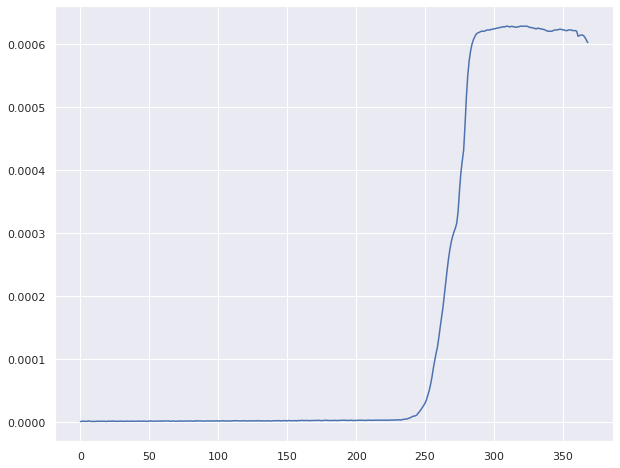

In [183]:
plt.plot(df_diodo['Corrente'])
plt.show()

In [258]:
fits = [ [], [] ]

In [295]:
fits[0] = curve_fit(
	lambda x, b, c: np.exp( b * ( x - c )),
	xdata=df_diodo['Tensao B'][240:],
	ydata=df_diodo['Corrente'][240:],
	sigma=df_diodo['sCorrente'][240:],
	maxfev=10000
	)

In [296]:
fits[1] = curve_fit(
	lambda x, b, c: np.exp( b * ( x - c )),
	xdata=df_diodo['Tensao B'][:201],
	ydata=df_diodo['Corrente'][:201],
	sigma=df_diodo['sCorrente'][:201]
)

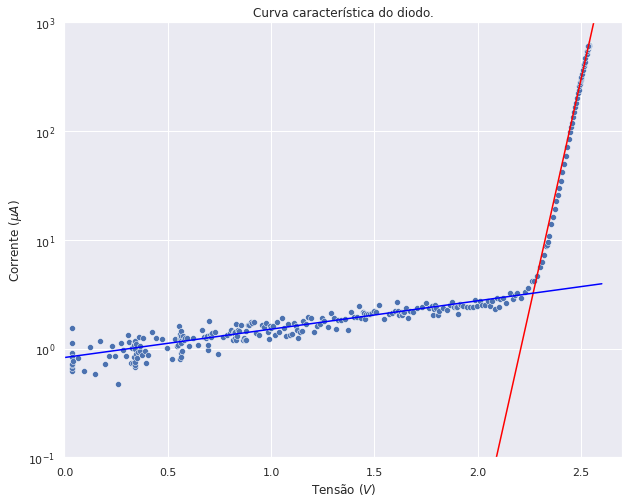

In [297]:
plt.title('Curva característica do diodo.')
sns.scatterplot(x=df_diodo['Tensao B'], y=df_diodo['Corrente'] * 1E6)

x = np.linspace(0, 2.6, 1000)
sns.lineplot(x=x, y=np.exp(fits[0][0][0]*(x - fits[0][0][1]))*1E6, color='red')
sns.lineplot(x=x, y=np.exp(fits[1][0][0]*(x - fits[1][0][1]))*1E6, color='blue')

plt.xlabel('Tensão ($V$)')
plt.ylabel('Corrente ($\mu A$)')
plt.xlim(0, 2.7)
plt.ylim(1E-1, 1E3)
plt.yscale('log')
plt.show()

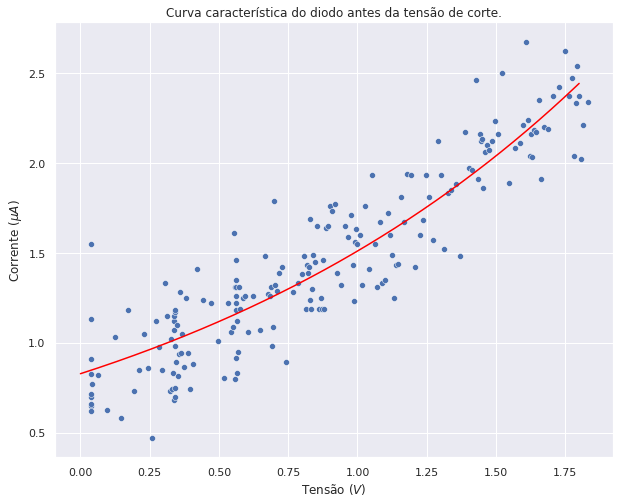

In [298]:
sns.scatterplot(x=df_diodo['Tensao B'][:201], y=df_diodo['Corrente'][:201]*1E6)
x = np.linspace(0, 1.8, 1000)
sns.lineplot(x=x, y=np.exp(fits[1][0][0]*(x-fits[1][0][1]))*1E6, color='red')
plt.xlabel('Tensão ($V$)')
plt.ylabel('Corrente ($\mu A$)')
plt.title('Curva característica do diodo antes da tensão de corte.')
plt.show()

In [242]:
sigma_y = df_diodo['Corrente'][:201] - np.exp(fits[1][0][0]*(df_diodo['Tensao B'][:201]-fits[1][0][1]))

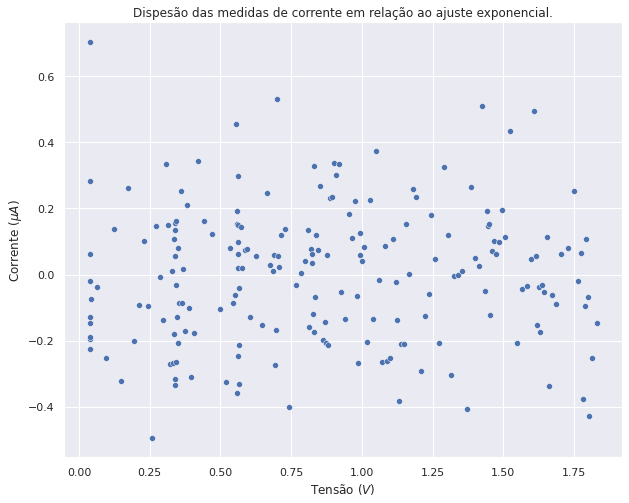

In [299]:
sns.scatterplot(x=df_diodo['Tensao B'][:201], y=sigma_y*1E6)
x = np.linspace(0, 1.8, 1000)
plt.xlabel('Tensão ($V$)')
plt.ylabel('Corrente ($\mu A$)')
plt.title('Dispesão das medidas de corrente em relação ao ajuste exponencial.')
plt.show()

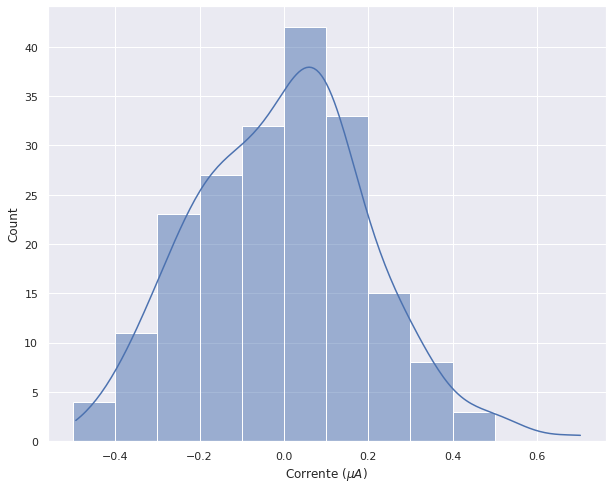

In [247]:
sns.histplot(sigma_y*1E6, bins=10, binrange=(-0.5, 0.5), kde=True)
plt.xlabel('Corrente ($\mu A$)')
plt.show()

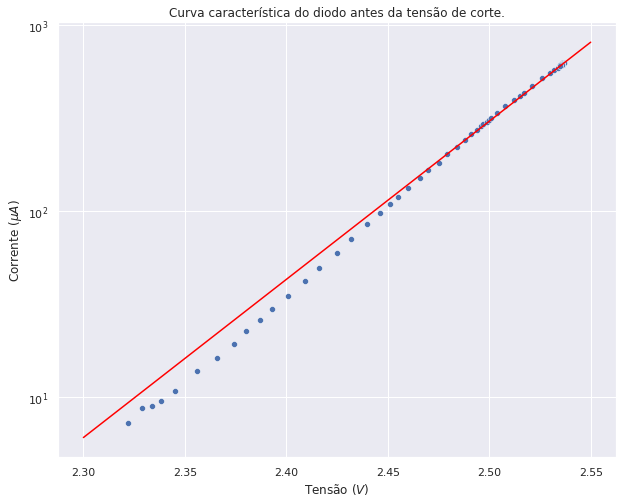

In [303]:
plt.title('Curva característica do diodo antes da tensão de corte.')

sns.scatterplot(x=df_diodo['Tensao B'][240:], y=df_diodo['Corrente'][240:]*1E6)

x = np.linspace(2.3, 2.55, 1000)
sns.lineplot(x=x, y=np.exp(fits[0][0][0]*(x-fits[0][0][1]))*1E6, color='red')

plt.xlabel('Tensão ($V$)')
plt.ylabel('Corrente ($\mu A$)')
plt.yscale('log')
plt.show()

In [301]:
print(f'Incerteza da corrente:\t{sigma_y.std()} muA')

Incerteza da corrente:	2.0484075014939564e-07 muA


In [285]:
np.sum(sigma_y**2 / (sigma_y.std()**2)) / 200

1.0000284842743417

In [302]:
np.sum( ( df_diodo['Corrente'][240:] - np.exp(fits[0][0][0]*(df_diodo['Tensao B'][240:]-fits[0][0][1])) )**2 / (sigma_y.std())**2 ) / (df_diodo[240:].shape[0] - 2)

599.4348927255714

## Painel Solar